<a href="https://colab.research.google.com/github/tomilolaoke/Predictions/blob/main/PREDICTION_OF_PPD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TITLE: PREDICTION OF POSTPARTUM DEPRESSION


BY: OLUWATOMILOLA OKE




In [ ]:
#Import the necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


In [ ]:
#Mount dataset on google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Exploratory Data Analysis(EDA)

In [ ]:
#Read file as csv or excel
df =pd.read_excel("/content/drive/MyDrive/data_PostNatal.xlsx")
#df =pd.read_csv("/content/drive/MyDrive/data_PostNatal.csv")
df.head(10)


,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling of guilt,Problems of bonding with baby,Suicide attempt,Feeling anxious
0,35-40,Yes,Yes,Two or more days a week,Yes,Yes,No,Yes,Yes,Yes
1,40-45,Yes,No,No,Yes,Yes,Yes,Yes,No,No
2,35-40,Yes,No,Yes,Yes,Yes,No,Sometimes,No,Yes
3,35-40,Yes,Yes,Yes,Yes,No,Maybe,No,No,Yes
4,40-45,Yes,No,Two or more days a week,Yes,No,No,Yes,No,Yes
5,30-35,No,No,Yes,Yes,Yes,No,No,Yes,Yes
6,40-45,No,Yes,No,No,No,No,No,Yes,Yes
7,35-40,Yes,No,Yes,Yes,No,No,No,No,Yes
8,35-40,Yes,Yes,No,Yes,No,No,No,Yes,No
9,30-35,Sometimes,Yes,Two or more days a week,No,Yes,No,Sometimes,Not interested to say,Yes


In [ ]:
#Visualise last 10 observations
df.tail()

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling of guilt,Problems of bonding with baby,Suicide attempt,Feeling anxious
1498,30-35,Yes,No,Two or more days a week,No,No,Maybe,Sometimes,No,Yes
1499,25-30,Sometimes,No,No,Often,No,Maybe,Yes,No,Yes
1500,25-30,No,Sometimes,Two or more days a week,No,No,Yes,No,Not interested to say,No
1501,25-30,No,Sometimes,Yes,Often,No,No,No,No,Yes
1502,45-50,Sometimes,Sometimes,Two or more days a week,No,No,Maybe,No,No,No


In [ ]:
#Check number of observations and variables
post_Nshape=df.shape
print("Shape of the data set :", post_Nshape)
#1503 rows and 10 columns

Shape of the data set : (1503, 10)


The dataset variables are categorical

In [ ]:
#View full Information about Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Age                                        1503 non-null   object
 1   Feeling sad or Tearful                     1503 non-null   object
 2   Irritable towards baby & partner           1497 non-null   object
 3   Trouble sleeping at night                  1503 non-null   object
 4   Problems concentrating or making decision  1491 non-null   object
 5   Overeating or loss of appetite             1503 non-null   object
 6   Feeling of guilt                           1494 non-null   object
 7   Problems of bonding with baby              1503 non-null   object
 8   Suicide attempt                            1503 non-null   object
 9   Feeling anxious                            1503 non-null   object
dtypes: object(10)
memory usage: 117.5+ K

In [ ]:
#Check column names
print(df.columns)

Index(['Age', 'Feeling sad or Tearful', 'Irritable towards baby & partner',
       'Trouble sleeping at night',
       'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Feeling of guilt',
       'Problems of bonding with baby', 'Suicide attempt', 'Feeling anxious'],
      dtype='object')


In [ ]:
#show data type of each column
df.dtypes

Age                                          object
Feeling sad or Tearful                       object
Irritable towards baby & partner             object
Trouble sleeping at night                    object
Problems concentrating or making decision    object
Overeating or loss of appetite               object
Feeling of guilt                             object
Problems of bonding with baby                object
Suicide attempt                              object
Feeling anxious                              object
dtype: object

In [ ]:
#Provide the summary of the variables
df.describe()

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling of guilt,Problems of bonding with baby,Suicide attempt,Feeling anxious
count,1503,1503,1497,1503,1491,1503,1494,1503,1503,1503
unique,5,3,3,3,3,3,3,3,3,2
top,40-45,Yes,Yes,Two or more days a week,No,No,No,No,No,Yes
freq,364,536,555,640,583,841,624,557,709,980


In [ ]:
#unique responses from respondents
stacked_df=df.stack()
stacked_df
stacked_df.unique()

array(['35-40', 'Yes', 'Two or more days a week', 'No', '40-45',
       'Sometimes', 'Maybe', '30-35', 'Not interested to say', '45-50',
       'Often', 'Not at all', '25-30'], dtype=object)

In [ ]:
#To identify type of elements in the target variable
for column in df.select_dtypes(include=["object"]).columns:
  print(column, df[column].unique())

Age ['35-40' '40-45' '30-35' '45-50' '25-30']
Feeling sad or Tearful ['Yes' 'No' 'Sometimes']
Irritable towards baby & partner ['Yes' 'No' 'Sometimes' nan]
Trouble sleeping at night ['Two or more days a week' 'No' 'Yes']
Problems concentrating or making decision ['Yes' 'No' 'Often' nan]
Overeating or loss of appetite ['Yes' 'No' 'Not at all']
Feeling of guilt ['No' 'Yes' 'Maybe' nan]
Problems of bonding with baby ['Yes' 'Sometimes' 'No']
Suicide attempt ['Yes' 'No' 'Not interested to say']
Feeling anxious ['Yes' 'No']


In [ ]:
#number of unique elements in each variable
df.nunique()

Age                                          5
Feeling sad or Tearful                       3
Irritable towards baby & partner             3
Trouble sleeping at night                    3
Problems concentrating or making decision    3
Overeating or loss of appetite               3
Feeling of guilt                             3
Problems of bonding with baby                3
Suicide attempt                              3
Feeling anxious                              2
dtype: int64

Frequency distribution

In [ ]:
#Generate frequency distribution of all variables
for i in df:
  print (df[i].value_counts())

Age
40-45    364
35-40    349
30-35    338
45-50    271
25-30    181
Name: count, dtype: int64
Feeling sad or Tearful
Yes          536
No           524
Sometimes    443
Name: count, dtype: int64
Irritable towards baby & partner
Yes          555
No           499
Sometimes    443
Name: count, dtype: int64
Trouble sleeping at night
Two or more days a week    640
Yes                        445
No                         418
Name: count, dtype: int64
Problems concentrating or making decision
No       583
Often    473
Yes      435
Name: count, dtype: int64
Overeating or loss of appetite
No            841
Yes           343
Not at all    319
Name: count, dtype: int64
Feeling of guilt
No       624
Maybe    528
Yes      342
Name: count, dtype: int64
Problems of bonding with baby
No           557
Sometimes    542
Yes          404
Name: count, dtype: int64
Suicide attempt
No                       709
Yes                      459
Not interested to say    335
Name: count, dtype: int64
Feeling anxiou

#Exploratory Data Analysis

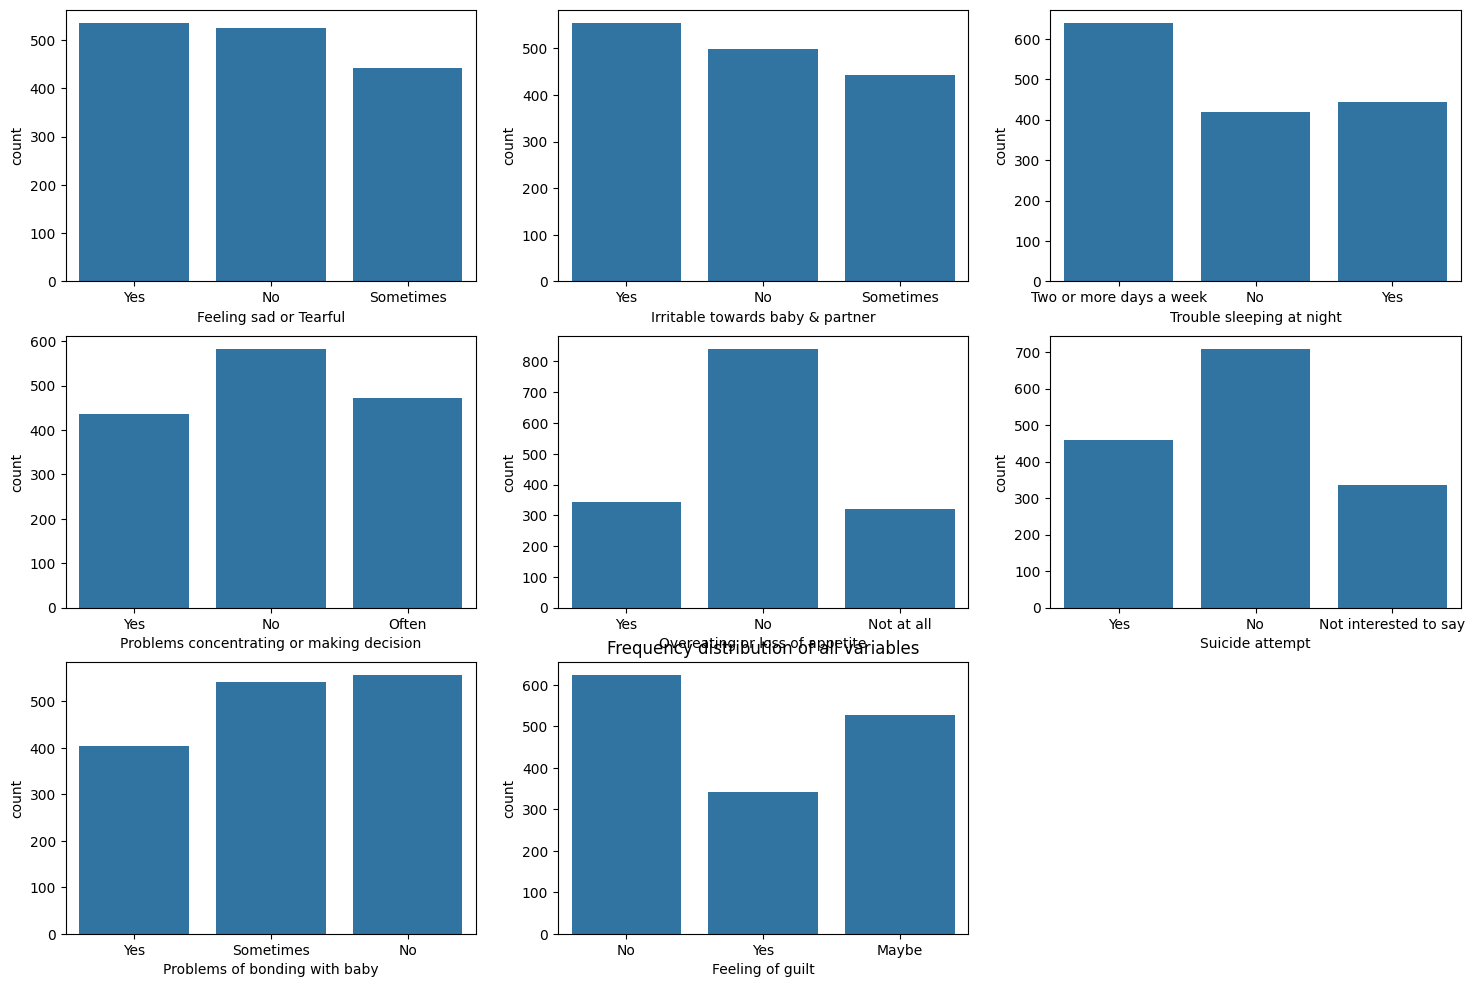

In [ ]:
#Plot frequency distribution plots of each variable to visualise & understand the data better
fig=plt.figure(figsize=(18,12))
ax1 = fig.add_subplot(3,3,1)
sns.countplot(data=df, x ='Feeling sad or Tearful')

ax2 = fig.add_subplot(3,3,2)
sns.countplot(data=df, x ='Irritable towards baby & partner')

ax3 = fig.add_subplot(3,3,3)
sns.countplot(data=df, x ='Trouble sleeping at night')

ax4 = fig.add_subplot(3,3,4)
sns.countplot(data=df, x ='Problems concentrating or making decision')

ax5 = fig.add_subplot(3,3,5)
sns.countplot(data=df, x ='Overeating or loss of appetite')

ax6 = fig.add_subplot(3,3,6)
sns.countplot(data=df, x ='Suicide attempt')

ax7 = fig.add_subplot(3,3,7)
sns.countplot(data=df, x ='Problems of bonding with baby')

ax8 = fig.add_subplot(3,3,8)
sns.countplot(data=df, x ='Feeling of guilt')
plt.title('Frequency distribution of all variables')
plt.show()
##save figure
#plt.savefig('Frequency distribution of all variables.png')

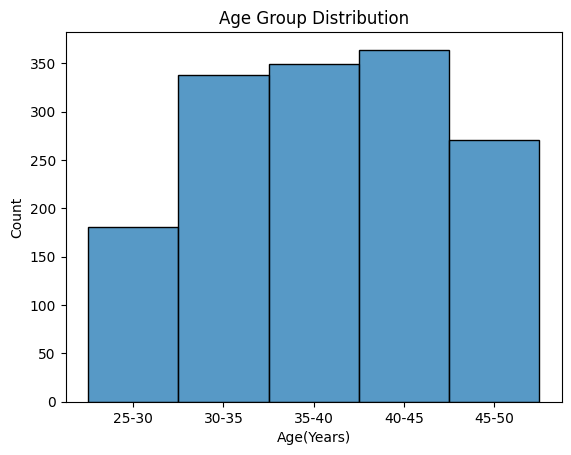

<Figure size 640x480 with 0 Axes>

In [ ]:
#Frequency distribution of Age
df_sort=df.sort_values(by='Age')
sns.histplot(data=df_sort, x='Age')
plt.xlabel('Age(Years)')
plt.title('Age Group Distribution')
plt.show()
plt.savefig('Frequency distribution of Age')

The Age distribution histogram indicates that majority of participants in the survey were within 40-45 years and the minority was between 25-30 years.

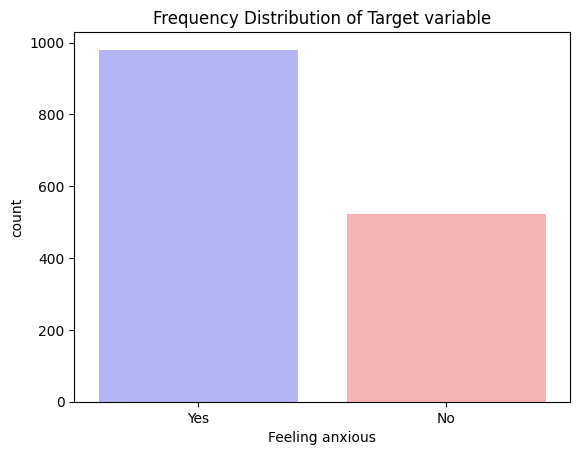

<Figure size 640x480 with 0 Axes>

In [ ]:
#distribution of target variable:
sns.countplot(data=df, x ='Feeling anxious',palette='bwr', hue='Feeling anxious')
plt.title('Frequency Distribution of Target variable')

plt.show()
##save figure
plt.savefig('Frequency Distribution of Target variable.png')

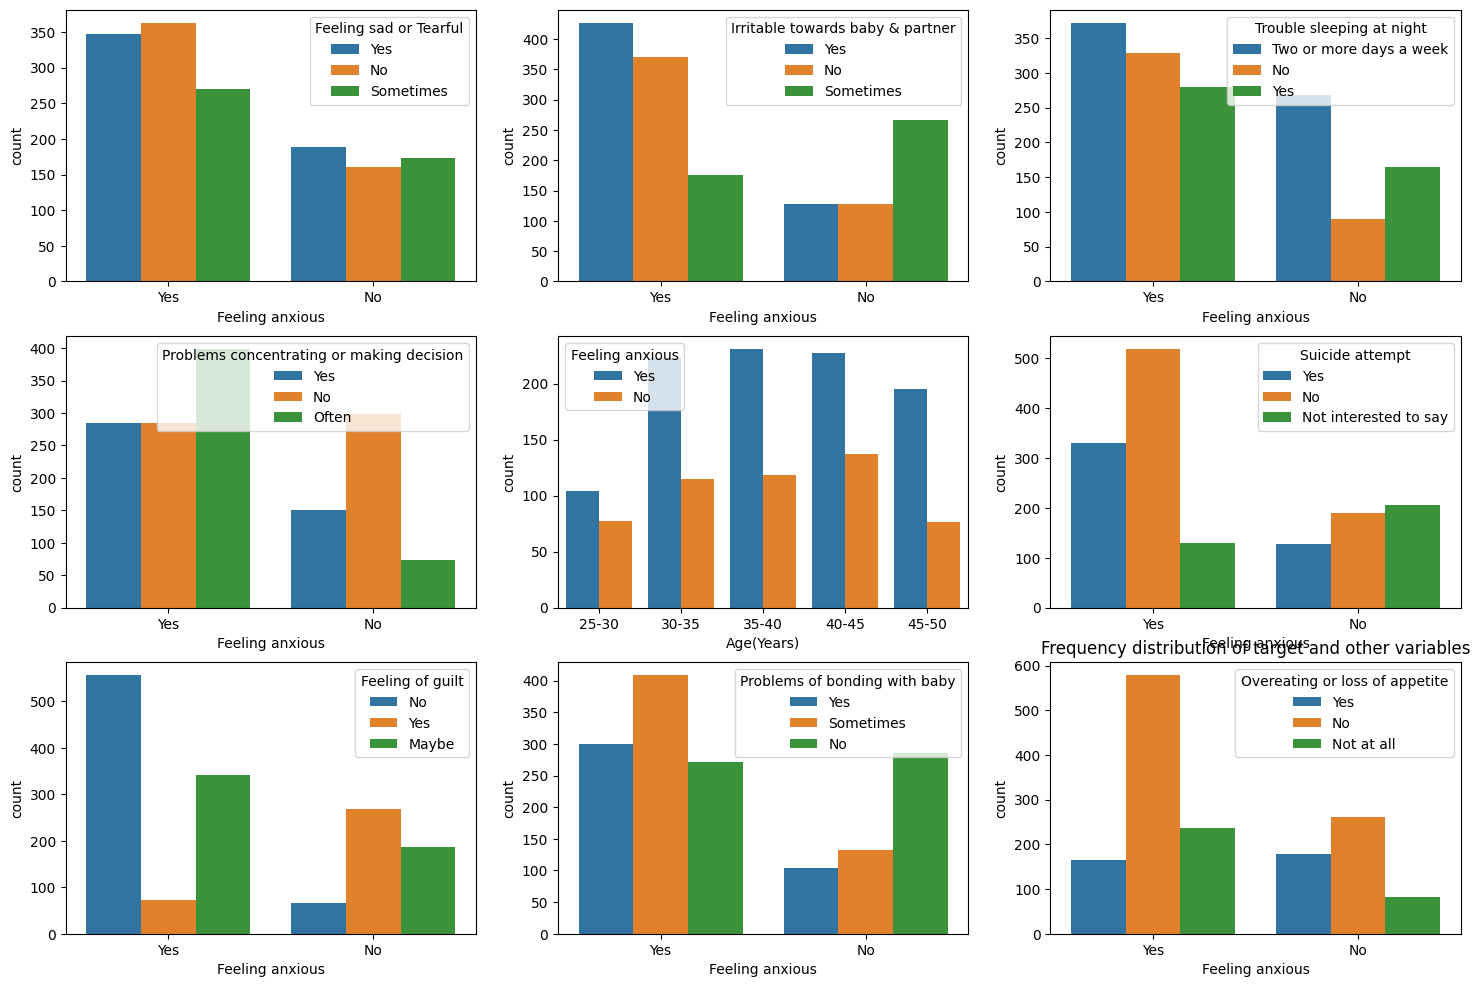

In [ ]:
#relationship between target variables and other attributes
fig=plt.figure(figsize=(18,12))
ax1 = fig.add_subplot(3,3,1)
sns.countplot(data=df, x ='Feeling anxious', hue='Feeling sad or Tearful')

ax2 = fig.add_subplot(3,3,2)
sns.countplot(data=df, x ='Feeling anxious', hue='Irritable towards baby & partner')

ax3 = fig.add_subplot(3,3,3)
sns.countplot(data=df, x ='Feeling anxious', hue='Trouble sleeping at night')

ax4 = fig.add_subplot(3,3,4)
sns.countplot(data=df, x ='Feeling anxious', hue='Problems concentrating or making decision')

ax5 = fig.add_subplot(3,3,5)
sns.countplot(data=df_sort, x ='Age', hue='Feeling anxious')
plt.xlabel('Age(Years)')

ax6 = fig.add_subplot(3,3,6)
sns.countplot(data=df, x ='Feeling anxious', hue='Suicide attempt')

ax7 = fig.add_subplot(3,3,7)
sns.countplot(data=df, x ='Feeling anxious', hue='Feeling of guilt')

ax8 = fig.add_subplot(3,3,8)
sns.countplot(data=df, x ='Feeling anxious', hue='Problems of bonding with baby')

ax9= fig.add_subplot(3,3,9)
sns.countplot(data=df, x ='Feeling anxious', hue='Overeating or loss of appetite')

plt.title('Frequency distribution of target and other variables')
plt.show()
#plt.savefig('Frequency distribution target and other variables.png')

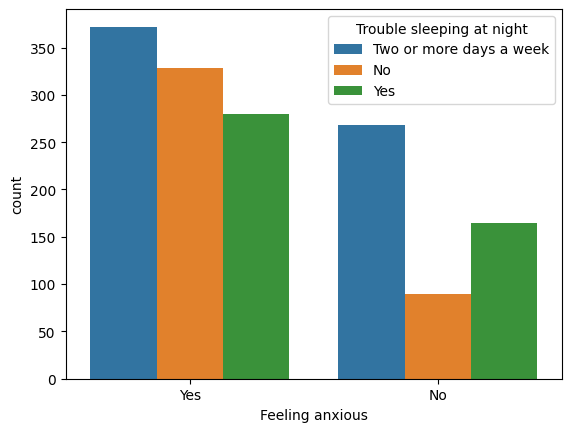

In [ ]:
ax = fig.add_subplot()
sns.countplot(data=df, x ='Feeling anxious', hue='Trouble sleeping at night')
plt.savefig('Barplot of relationship between Trouble sleeping at night and Feeling anxiuos')

<Axes: title={'center': 'Proportion of Suicidal patients'}, ylabel='proportion'>

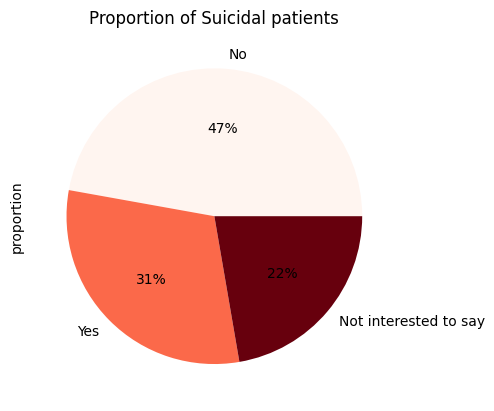

In [ ]:
#proportion of suicide attempts
suicidal_prop=df['Suicide attempt'].value_counts(normalize=True)*100
suicidal_prop.plot(kind='pie', colormap='Reds', autopct='%1.0f%%',title='Proportion of Suicidal patients')
#plt.savefig('Proportion of Suicidal patients.png')

# Data Cleaning
Handling Missing Values

In [ ]:
#Number of null values in the data frame

df.isna().sum()

Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Feeling of guilt                              9
Problems of bonding with baby                 0
Suicide attempt                               0
Feeling anxious                               0
dtype: int64

In [ ]:
df.isnull().values.any(axis=1)
print(df.isnull())
print(df[df.isnull().any(axis=1)])

        Age  Feeling sad or Tearful  Irritable towards baby & partner  \
0     False                   False                             False   
1     False                   False                             False   
2     False                   False                             False   
3     False                   False                             False   
4     False                   False                             False   
...     ...                     ...                               ...   
1498  False                   False                             False   
1499  False                   False                             False   
1500  False                   False                             False   
1501  False                   False                             False   
1502  False                   False                             False   

      Trouble sleeping at night  Problems concentrating or making decision  \
0                         False              

In [ ]:
percentage_missing = (df.isnull().mean() * 100).round(2)
print(percentage_missing)

Age                                          0.0
Feeling sad or Tearful                       0.0
Irritable towards baby & partner             0.4
Trouble sleeping at night                    0.0
Problems concentrating or making decision    0.8
Overeating or loss of appetite               0.0
Feeling of guilt                             0.6
Problems of bonding with baby                0.0
Suicide attempt                              0.0
Feeling anxious                              0.0
dtype: float64


Filling null values with Mode

In [ ]:
#option:imput the missing values with mode because not to lose vital informations
#& for predictive modelling,because dataset is small, nas are small
df_imputed=df.apply(lambda x:x.fillna(x.mode()[0]))
df_imputed.isnull().sum()


Age                                          0
Feeling sad or Tearful                       0
Irritable towards baby & partner             0
Trouble sleeping at night                    0
Problems concentrating or making decision    0
Overeating or loss of appetite               0
Feeling of guilt                             0
Problems of bonding with baby                0
Suicide attempt                              0
Feeling anxious                              0
dtype: int64

In [ ]:
#to check:
print(df[df_imputed.isnull().any(axis=1)])

Empty DataFrame
Columns: [Age, Feeling sad or Tearful, Irritable towards baby & partner, Trouble sleeping at night, Problems concentrating or making decision, Overeating or loss of appetite, Feeling of guilt, Problems of bonding with baby, Suicide attempt, Feeling anxious]
Index: []


In [ ]:
df_imputed.dtypes

Age                                          object
Feeling sad or Tearful                       object
Irritable towards baby & partner             object
Trouble sleeping at night                    object
Problems concentrating or making decision    object
Overeating or loss of appetite               object
Feeling of guilt                             object
Problems of bonding with baby                object
Suicide attempt                              object
Feeling anxious                              object
dtype: object

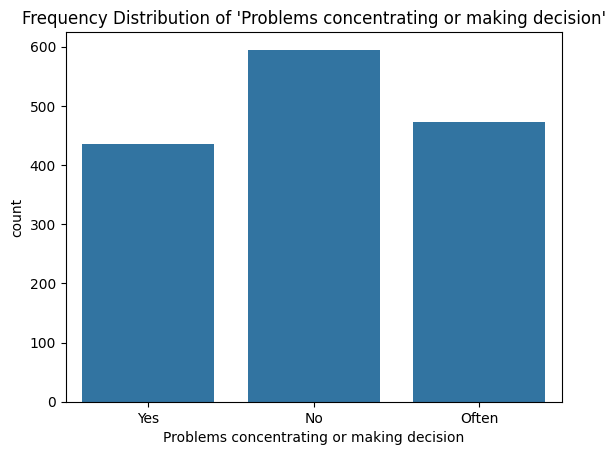

In [ ]:
#Check Frequency distribution for major change in  after imputting null values
sns.countplot(data=df_imputed, x ='Problems concentrating or making decision')
plt.title("Frequency Distribution of 'Problems concentrating or making decision'")
plt.show()

#Pre-processing
Feature selection


In [ ]:
#Using all 9 variables as predictors
X=df_imputed.drop(['Feeling anxious'],axis=1)

In [ ]:
#Setting our target variable
y=df_imputed['Feeling anxious']

One-hot Encoding

In [ ]:
#Convert categorical dataset to binary
X_encoded=pd.get_dummies(X)
X_encoded.head()

,Age_25-30,Age_30-35,Age_35-40,Age_40-45,Age_45-50,Feeling sad or Tearful_No,Feeling sad or Tearful_Sometimes,Feeling sad or Tearful_Yes,Irritable towards baby & partner_No,Irritable towards baby & partner_Sometimes,...,Overeating or loss of appetite_Yes,Feeling of guilt_Maybe,Feeling of guilt_No,Feeling of guilt_Yes,Problems of bonding with baby_No,Problems of bonding with baby_Sometimes,Problems of bonding with baby_Yes,Suicide attempt_No,Suicide attempt_Not interested to say,Suicide attempt_Yes
0,False,False,True,False,False,False,False,True,False,False,...,True,False,True,False,False,False,True,False,False,True
1,False,False,False,True,False,False,False,True,True,False,...,True,False,False,True,False,False,True,True,False,False
2,False,False,True,False,False,False,False,True,True,False,...,True,False,True,False,False,True,False,True,False,False
3,False,False,True,False,False,False,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False
4,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,False,False,True,True,False,False


Scaling of features:

In [ ]:
from sklearn.preprocessing import StandardScaler
scaled_X= StandardScaler().fit_transform(X_encoded)

In [ ]:
#check size of data
scaled_X
scaled_X.shape

(1503, 29)

Hold-Out Validation: Split Data into test and train

In [ ]:
#split data
X_train, X_test, y_train,y_test= train_test_split(scaled_X, y,
                                  test_size =0.2,random_state=42,stratify=y)

In [ ]:
#check effect of split
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1202, 29)
(1202,)
(301, 29)
(301,)


In [ ]:
#check split
scaled_X.shape, y.shape

((1503, 29), (1503,))

Feature extraction

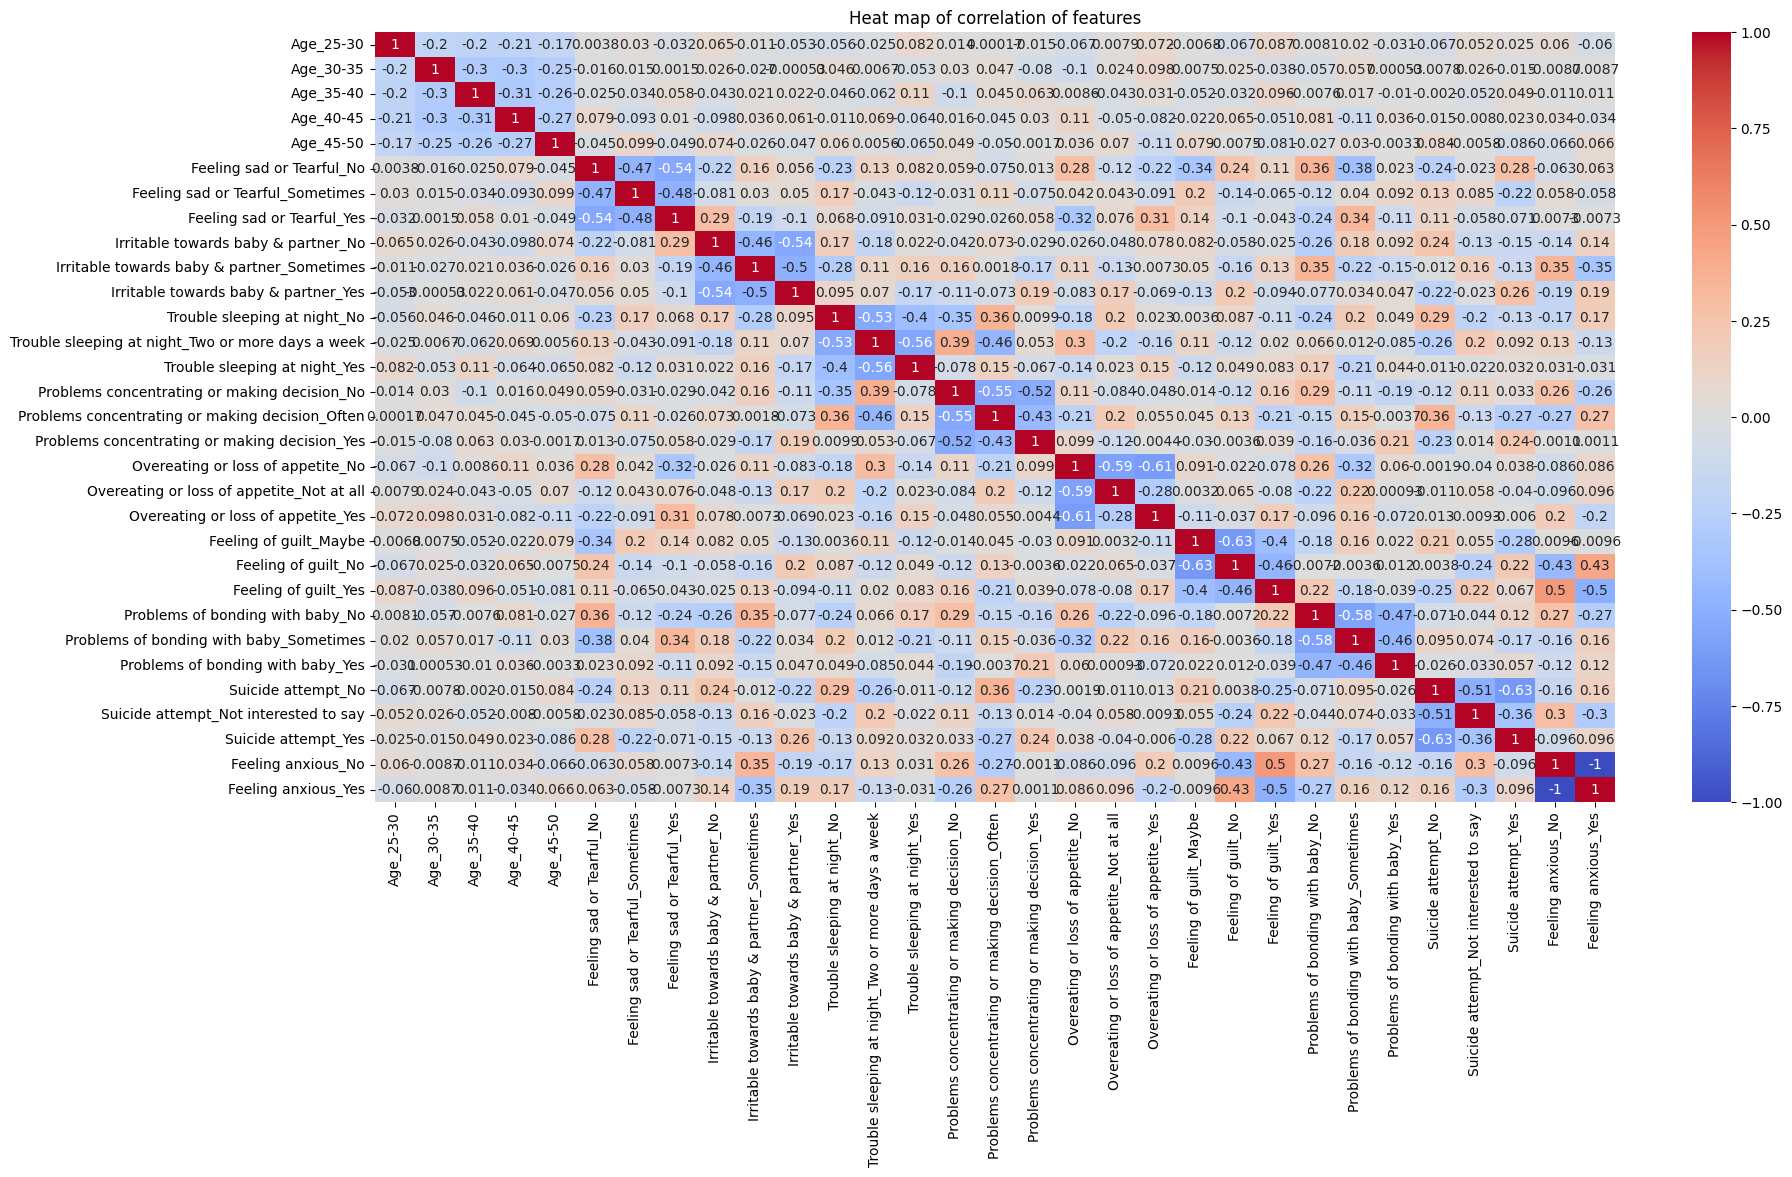

In [ ]:
#Heat map to visualise relationship between features
encoded_df=pd.get_dummies(df_imputed)
cor_matrix=encoded_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm')
plt.title('Heat map of correlation of features')
plt.savefig('Correlation heatmap.png')




#Model Selection:

#K-NEAREST NEIGHBORS

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

kclass=KNeighborsClassifier()
scores=[]
cv_sco=cross_val_score(kclass, X_train,y_train, cv=5)
print('cross-val:', cv_sco.mean())


cross-val: 0.8885027662517289


88.85 percent accuracy on average on the test set which indicates a good performance of the model on test set. Will carry out parameter tuning to the value of k to optimise model's performance

In [ ]:
#Perform Grid search validation
from sklearn.model_selection import GridSearchCV
n_neighbours={'n_neighbors':range(3,17)}
kclass =KNeighborsClassifier()
g_search=GridSearchCV(kclass, n_neighbours,cv=5,scoring='accuracy')
g_search.fit(X_train, y_train)
parameter=g_search.best_params_['n_neighbors']
bestParameter=g_search.best_params_
print(parameter)
print(bestParameter)

3
{'n_neighbors': 3}


In [ ]:
#KNN CLASSIFIER
#it is versatile in easily adapting to new data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
kclass1=KNeighborsClassifier(n_neighbors=3)
#train model on train set
trained_kn=kclass1.fit(X_train,y_train)
#predict model on test set
y_predicted=kclass1.predict(X_test)
print((accuracy_score(y_test,y_predicted)))

0.9102990033222591


In [ ]:
#measures knn performance with k from 3 to 16
scores_testset=[]
scores_trainset=[]

for i in range (3,17):
  knn_class=KNeighborsClassifier(i)
  knn_class.fit(X_train, y_train)

  scores_testset.append(knn_class.score(X_test, y_test))
  scores_trainset.append(knn_class.score(X_train, y_train))
  maxscore_train=max(scores_trainset)
  maxscore_test=max(scores_testset)
print('Maximum training score is ', maxscore_train*100,
        '%, and Maximum test score:',maxscore_test*100,'%', 'when k =',i)

Maximum training score is  98.50249584026622 %, and Maximum test score: 91.0299003322259 % when k = 16


In [ ]:
kclass=KNeighborsClassifier(n_neighbors=16)
#train model on train set
trained_kn=kclass.fit(X_train,y_train)
y_predi=kclass.predict(X_test)
#predict model on test set
kclass.score(X_test,y_test)

0.8970099667774086

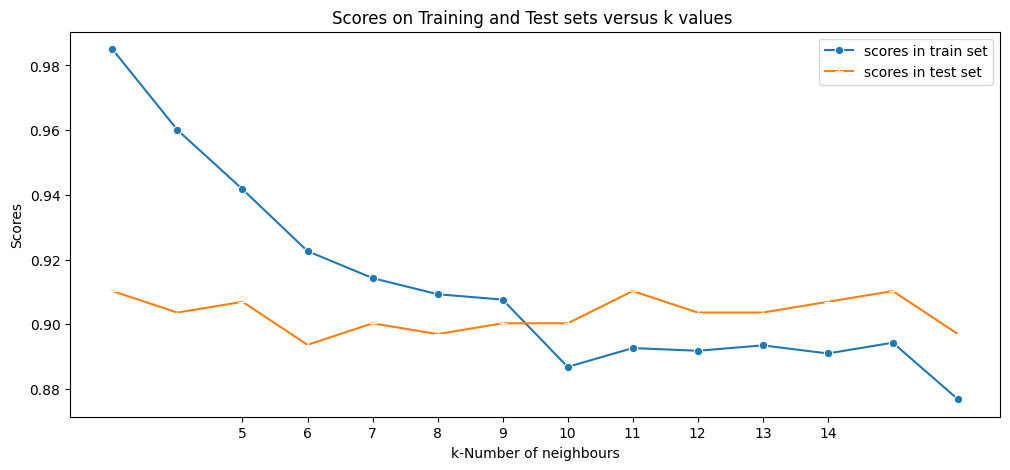

In [ ]:
#starter code adapted from [1], x and y values were changed, labels were changed along with title
#Visualise performance at different
plt.figure(figsize=(12,5))
k_value= range(3,17)
res=sns.lineplot(x=k_value,y=scores_trainset, marker='o', label='scores in train set')
res=sns.lineplot(x=k_value,y=scores_testset, marker='+' ,label='scores in test set')
plt.title('Scores on Training and Test sets versus k values ')
plt.xlabel('k-Number of neighbours')
plt.ylabel('Scores')
plt.xticks(range(5,15))
plt.legend()
plt.show()

The plot indicates an overall good performance at these values of k within the range. The optimal value is confirmed to be 1 as stated in the best parameter analysis. The model starts to perform better on the test set at k=9.4. To prevent overfitting on train set, we test at  value of k =11.

In [ ]:
kclass=KNeighborsClassifier(n_neighbors=11)
#train model on train set
trained_kn=kclass.fit(X_train,y_train)
y_predi=kclass.predict(X_test)
#predict model on test set
Accuracy_score=kclass.score(X_test,y_test)
print('Accuracy score for KNN Model:',Accuracy_score )

Accuracy score for KNN Model: 0.9102990033222591


In [ ]:
#Evaluate precision
from sklearn.metrics import precision_score
print(precision_score(y_test,y_predi,pos_label='Yes'))

0.916256157635468


In [ ]:
#Evaluate Recall(sensitivity)
from sklearn.metrics import recall_score
print(recall_score(y_test,y_predi,pos_label='Yes'))

0.9489795918367347


In [ ]:
#Generate confusion matrix
from sklearn.metrics import confusion_matrix
cf= confusion_matrix(y_test,y_predi)

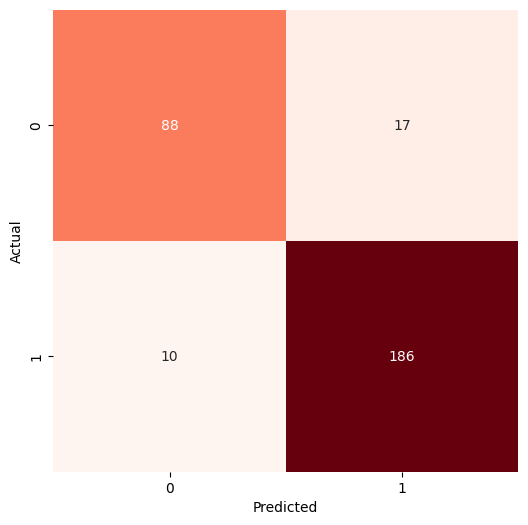

In [ ]:
#Plot confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cf, annot = True,fmt ='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#Generate Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predi))
print(confusion_matrix(y_test,y_predi))


              precision    recall  f1-score   support

          No       0.90      0.84      0.87       105
         Yes       0.92      0.95      0.93       196

    accuracy                           0.91       301
   macro avg       0.91      0.89      0.90       301
weighted avg       0.91      0.91      0.91       301

[[ 88  17]
 [ 10 186]]


In [ ]:
#ROC CURVE: informs about the goodness of fit of the model
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
probab_ypred =kclass.predict_proba(X_test)[:,1]

fpr,tpr, thresholds=roc_curve(y_test_encoded,probab_ypred)

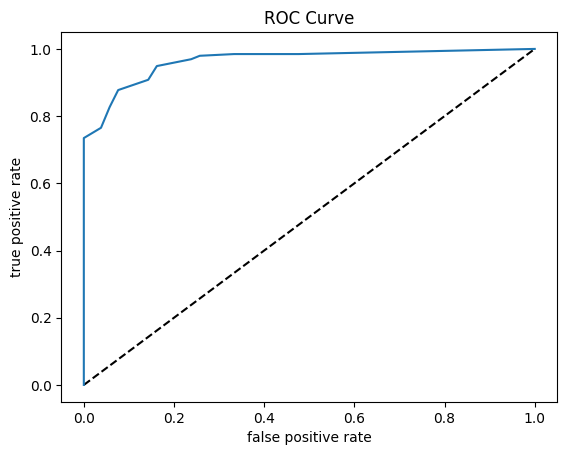

In [ ]:
#visualise ROC Curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='K -Nearest neighbours')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
#AUC under ROC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,probab_ypred)

0.9641156462585034

#Random Forest Model

In [ ]:
#Split dataset without scaling
X2_train, X2_test, Y_train,Y_test= train_test_split(X_encoded, y,
                                  test_size =0.2,random_state=42,stratify=y)

In [ ]:
#Strated code adapted from [3], random state and data for fitting the model has been changef
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
model2=RandomForestClassifier(n_estimators=10,random_state=30)
model2.fit(X2_train,Y_train)
prediction_test =model2.predict(X2_test)

#print(prediction_test)

conf_m= confusion_matrix(Y_test,prediction_test)
print(conf_m)
print('Accuracy on test data ;',metrics.accuracy_score(Y_test, prediction_test))
print(classification_report(Y_test, prediction_test))

[[105   0]
 [  4 192]]
Accuracy on test data ; 0.9867109634551495
              precision    recall  f1-score   support

          No       0.96      1.00      0.98       105
         Yes       1.00      0.98      0.99       196

    accuracy                           0.99       301
   macro avg       0.98      0.99      0.99       301
weighted avg       0.99      0.99      0.99       301



In [ ]:
#recall =tpr
#precision=fpr
from sklearn.metrics import precision_score
print(precision_score(Y_test,prediction_test,pos_label='Yes'))

1.0


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(Y_test,prediction_test,pos_label='Yes'))

0.9795918367346939


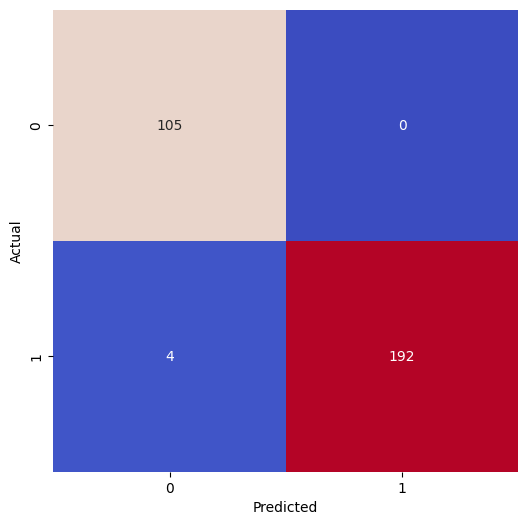

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(conf_m, annot = True,fmt ='d', cmap='coolwarm', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#evaluate effect of increasing number trees on model
from sklearn.ensemble import RandomForestClassifier
rand_class = RandomForestClassifier(n_estimators=100, random_state=30)#number of trees
rand_class.fit(X2_train, Y_train)

predicted=rand_class.predict(X2_test)
print(f"Accuracy score:{accuracy_score(Y_test,predicted)}")

print(pd.DataFrame(classification_report(Y_test, predicted, output_dict=True)))

print(confusion_matrix(Y_test, predicted))

Accuracy score:0.9867109634551495
                   No         Yes  accuracy   macro avg  weighted avg
precision    0.963303    1.000000  0.986711    0.981651      0.987199
recall       1.000000    0.979592  0.986711    0.989796      0.986711
f1-score     0.981308    0.989691  0.986711    0.985500      0.986767
support    105.000000  196.000000  0.986711  301.000000    301.000000
[[105   0]
 [  4 192]]


In [ ]:
#Evaluate Precision
from sklearn.metrics import precision_score
print(precision_score(Y_test,predicted,pos_label='Yes'))

1.0


In [ ]:
#Evaluate Recall
from sklearn.metrics import recall_score
print(recall_score(Y_test,predicted,pos_label='Yes'))

0.9795918367346939


In [ ]:
#Select first decision tree
tree1=rand_class.estimators_[0]
tree1

DecisionTreeClassifier(max_features='sqrt', random_state=209652396)

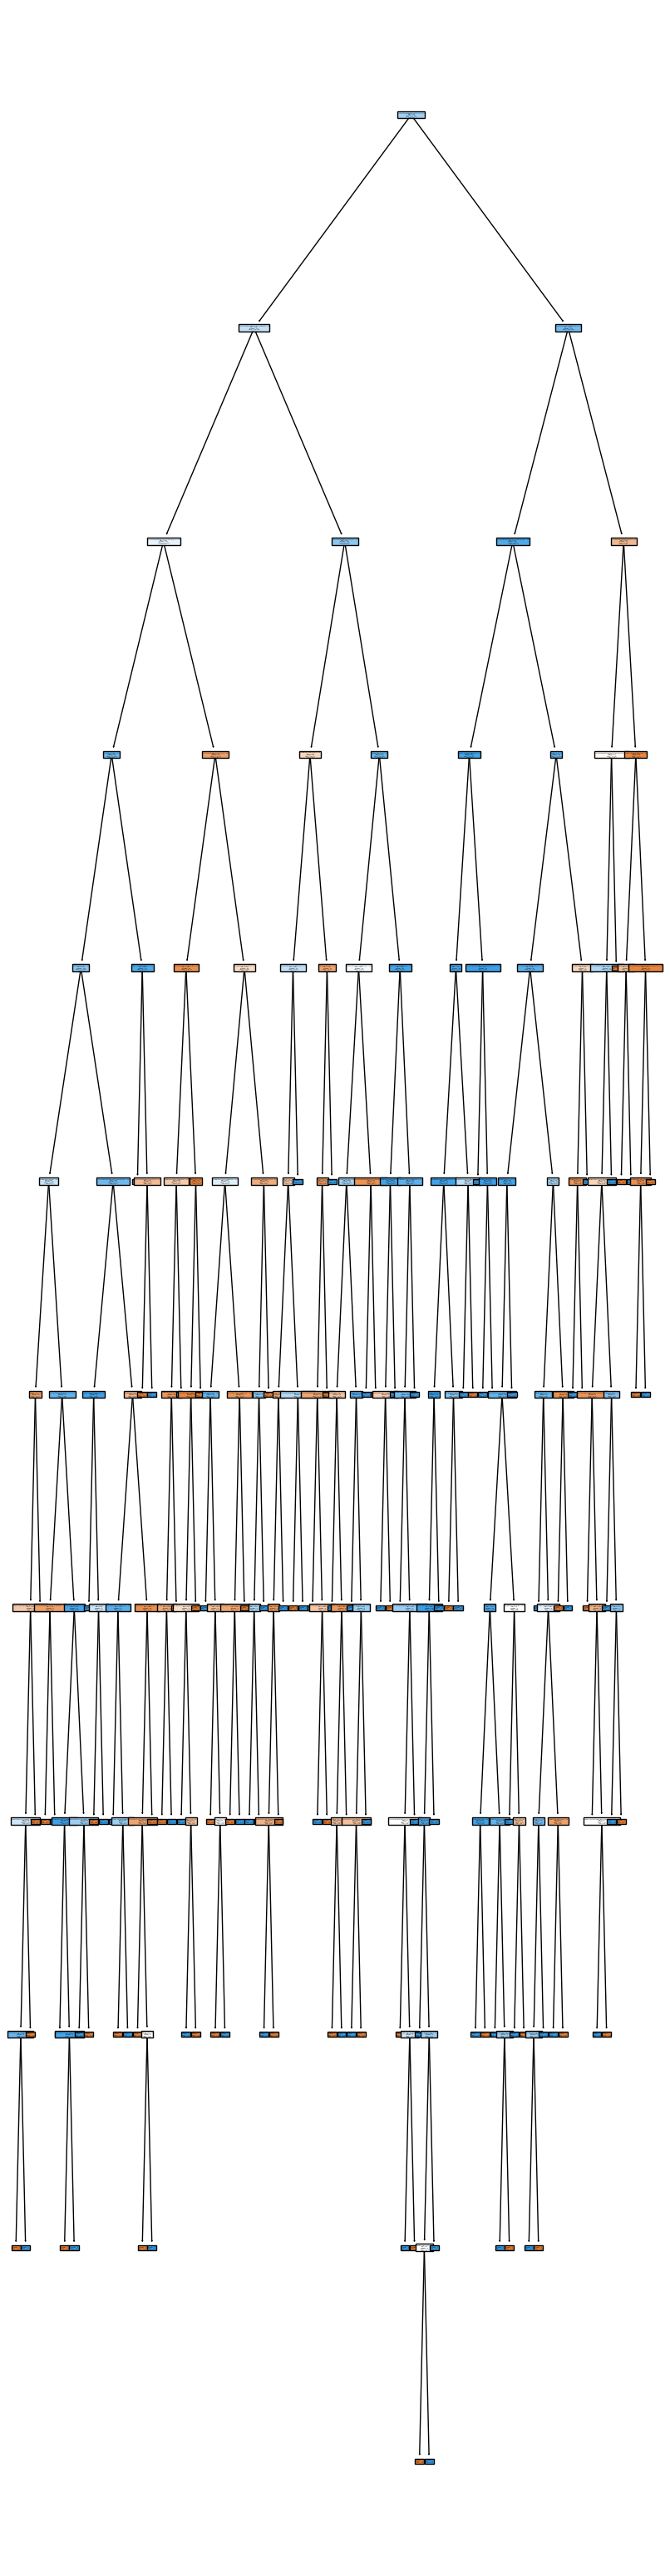

In [ ]:
#VISUALISE DECISION TREE
from sklearn import tree
classes =['Yes','No']
plt.figure(figsize=(10,40))
dec_tree_plot=tree.plot_tree(tree1, feature_names=X_encoded.columns, class_names=classes,
                    filled=True)

In [ ]:
#Genearate confusion matrix
cf2= confusion_matrix(Y_test,predicted)

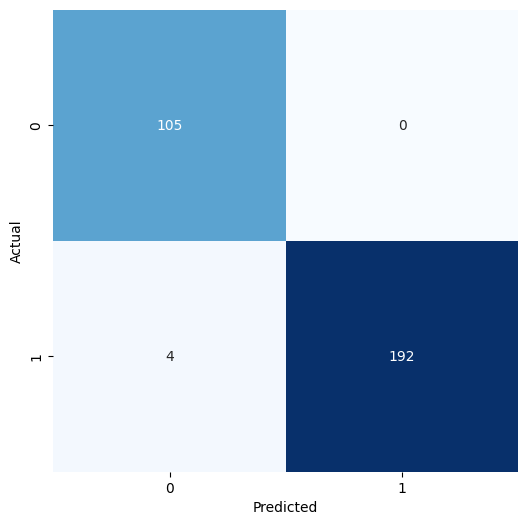

In [ ]:
#plot cf2
plt.figure(figsize=(6,6))
sns.heatmap(cf2, annot = True,fmt ='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#Transform y to plot ROC Curve
y_t_encoded = label_encoder.fit_transform(Y_test)

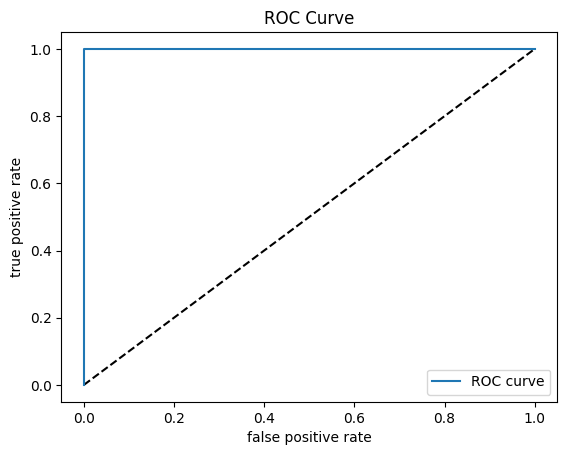

In [ ]:
#starter code adapted from [1], axis labels, plot title were changed
#Plot ROC Curve
y_probs2=rand_class.predict_proba(X2_test)[:,1]
fpr,tpr, thresholds=roc_curve(y_t_encoded,y_probs2)
roc_auc_RF=auc(fpr, tpr)


plt.figure()
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
#Estimate area under ROC Curve on test data
roc_auc2 =roc_auc_score(Y_test,y_probs2)
print(roc_auc2)

1.0


In [ ]:
#Feature importance
important_Feat=pd.DataFrame(rand_class.feature_importances_, index=X2_train.columns, columns=['Feature Score'])
important_Feat.sort_values(by='Feature Score', ascending =False, inplace=True)
important_Feat

,Feature Score
Feeling of guilt_Yes,0.114743
Feeling of guilt_No,0.089716
Irritable towards baby & partner_Sometimes,0.064881
Problems of bonding with baby_No,0.053406
Overeating or loss of appetite_Yes,0.045315
Problems concentrating or making decision_No,0.045278
Problems concentrating or making decision_Often,0.037556
Feeling of guilt_Maybe,0.036292
Suicide attempt_Not interested to say,0.034092
Irritable towards baby & partner_Yes,0.032478


In [ ]:
#Starter codes adapted from [2], arguements were changed,here it is used to generate the maximum proportion of important features
#Convert data frame to series
important_Featseries=pd.Series(rand_class.feature_importances_, index=X2_train.columns).sort_values(ascending=False)
important_Featseries.max()

0.11474344188573275

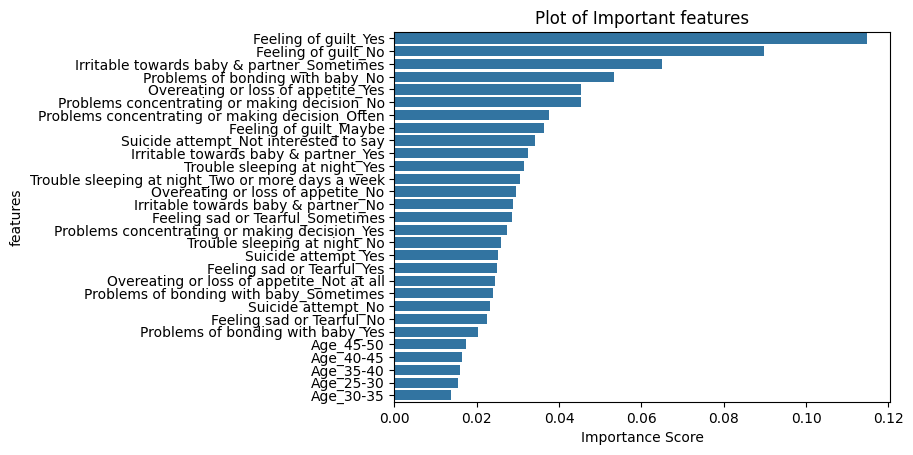

In [ ]:
#Starter codes adapted from [2], arguements, axes labels and plot title have been changed
#Visualise features
sns.barplot(x=important_Featseries,y=important_Featseries.index)

plt.xlabel('Importance Score')
plt.ylabel('features')
plt.title('Plot of Important features')
plt.show()

In [ ]:
#Random Forest based on important features: feature with score less 0.016
#remove features of all ages except Ages 35-40 years
important_X=X_encoded.drop(['Age_30-35','Age_25-30','Age_25-30'],axis=1)
y_secndRF=df_imputed['Feeling anxious']


In [ ]:
print(important_X.shape)
print(y_secndRF.shape)

(1503, 27)
(1503,)


In [ ]:
#split into train and test
X3_train, X3_test, y3_train,y_3test=train_test_split(important_X,y_secndRF, test_size=0.2, random_state=42)

In [ ]:
randm_class1=RandomForestClassifier(n_estimators=10, random_state=0)
randm_class1.fit(X3_train,y3_train)
pred_RF10= randm_class1.predict(X3_test)

print('Accuracy with 10 decision trees after removal of features:',accuracy_score(y_3test, pred_RF10))

Accuracy with 10 decision trees after removal of features: 0.9667774086378738


In [ ]:
print(classification_report(y_3test,pred_RF10))

              precision    recall  f1-score   support

          No       0.92      0.98      0.95        95
         Yes       0.99      0.96      0.98       206

    accuracy                           0.97       301
   macro avg       0.96      0.97      0.96       301
weighted avg       0.97      0.97      0.97       301



In [ ]:
confusion_mat =confusion_matrix(y_3test,pred_RF10)
print(confusion_mat)

[[ 93   2]
 [  8 198]]


In [ ]:
y_RF2 = label_encoder.fit_transform(y_3test)

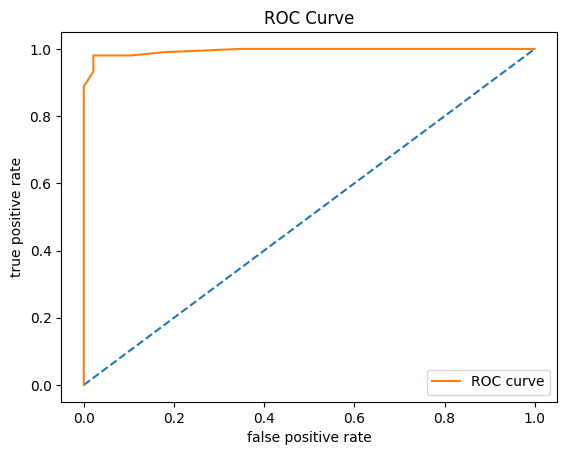

In [ ]:
#starter code adapted from [1], axis labels, plot title were changed
#Measure performance by generating ROC Curve
y_probs2=randm_class1.predict_proba(X3_test)[:,1]
fpr,tpr, thresholds=roc_curve(y_RF2,y_probs2)
roc_auc_RF=auc(fpr, tpr)


plt.figure()
plt.plot([0,1],[0,1],'--')
plt.plot(fpr,tpr, label='ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
#Evaluate Area under ROC Curve
roc_auc2 =roc_auc_score(y_3test,y_probs2)
print(roc_auc2)

0.507026060296372


In [ ]:
#Estimate accuracy score
randm_class2=RandomForestClassifier(n_estimators=100, random_state=0)
randm_class2.fit(X3_train,y3_train)
pred_RF100= randm_class2.predict(X3_test)

print('Accuracy with 100 decision trees after removal of features:',accuracy_score(y_3test, pred_RF100))

Accuracy with 100 decision trees after removal of features: 0.973421926910299


In [ ]:
print(classification_report(y_3test,pred_RF100))

              precision    recall  f1-score   support

          No       0.94      0.98      0.96        95
         Yes       0.99      0.97      0.98       206

    accuracy                           0.97       301
   macro avg       0.96      0.97      0.97       301
weighted avg       0.97      0.97      0.97       301



In [ ]:
#confusion matrix with 100 estimators
confusion_mat =confusion_matrix(y_3test,pred_RF100)
print(confusion_mat)

[[ 93   2]
 [  6 200]]


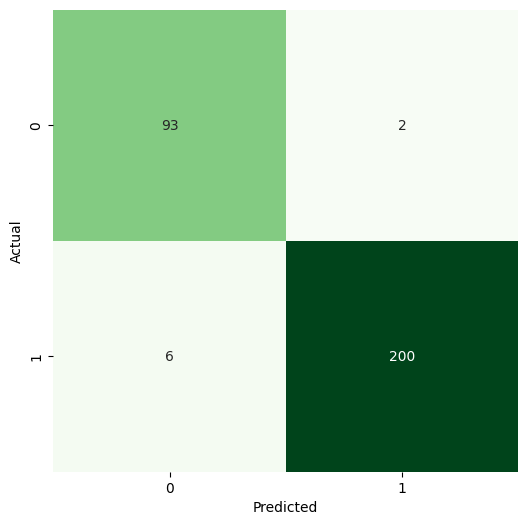

In [ ]:
#Visualise confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(confusion_mat, annot = True,fmt ='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
y_RF2 = label_encoder.fit_transform(y_3test)

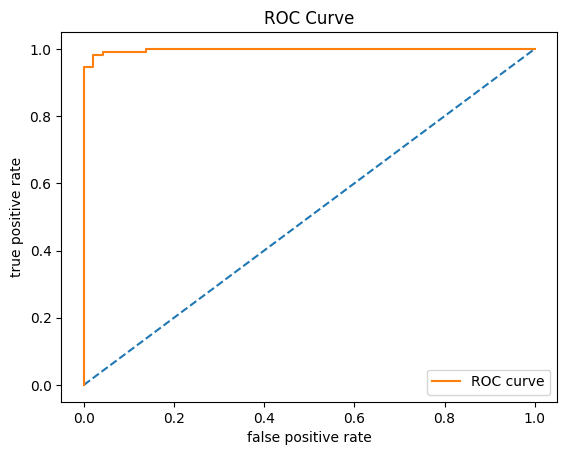

In [ ]:
#starter code adapted from [1], axis labels, plot title were changed
y_probs3=randm_class2.predict_proba(X3_test)[:,1]
fpr,tpr, thresholds=roc_curve(y_RF2,y_probs3)
roc_auc_RF=auc(fpr, tpr)


plt.figure()
plt.plot([0,1],[0,1],'--')
plt.plot(fpr,tpr, label='ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
roc_auc3 =roc_auc_score(y_3test,y_probs3)
print(roc_auc3)

0.997547266223812


REFERENCES:(Cited in the code comments)


[1]Shruti Singh.Step by Step Diabetes Classification:KNN Detailed. Kaggle, 2021.Retrieved from:https://www.kaggle.com/code/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed. [Accessed: 9th April 2024]
[2]Prashant Sharma.Random Forest
Classifier Tutorial. 2020. Retrieved from:https://www.geeksforgeeks.org/ml-one-hot-encoding/.
[Accessed: 1st April 2024]